In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
comment_df = pd.read_excel(r"C:\Users\Binguni\Desktop\FCT\SA_Textblob\datasets\dataset.xlsx")

In [16]:
comment_df.head()

,Product_Category,Product_id,Product_Brand,Post Aspect,Comment
0,Beverages,B001,Nestomalt,Price,"There is no price control on milk powder, have..."
1,Beverages,B001,Nestomalt,Price,Everyone says it's too expensive
2,Beverages,B001,Nestomalt,Price,inflation in Sri Lanka
3,Beverages,B001,Nestomalt,Price,Price is affordable
4,Beverages,B001,Nestomalt,Price,It would be a huge crime to increase the price...


## Outlier in comments

In [17]:
comment_df['Comment_Word_Count'] = comment_df['Comment'].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Number of Words')

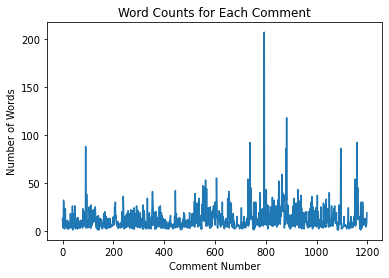

In [18]:
comment_df['Comment_Word_Count'].plot()
plt.title('Word Counts for Each Comment')
plt.xlabel('Comment Number')
plt.ylabel('Number of Words')

In [19]:
comment_df[comment_df['Comment_Word_Count'] > 200]

,Product_Category,Product_id,Product_Brand,Post Aspect,Comment,Comment_Word_Count
794,Diary Products,D002,Highland Milk Powder,Safety,These companies are looking into the short ter...,207


In [20]:
comment_df[comment_df['Comment_Word_Count'] > 100]

,Product_Category,Product_id,Product_Brand,Post Aspect,Comment,Comment_Word_Count
794,Diary Products,D002,Highland Milk Powder,Safety,These companies are looking into the short ter...,207
882,Diary Products,D002,Highland Milk Powder,Price,Though I do not have first hand experience wit...,118


In [21]:
comment_df[comment_df['Comment_Word_Count'] > 50]

,Product_Category,Product_id,Product_Brand,Post Aspect,Comment,Comment_Word_Count
91,Beverages,B001,Nestomalt,Safety,This is how it is. It is said that there is no...,88
563,Diary Products,D001,Anchor Milk Powder,Safety,Anchor milk has been my most favorite milk bra...,53
606,Diary Products,D001,Anchor Milk Powder,Safety,The best answer to what is said to be accustom...,55
730,Diary Products,D001,Anchor Milk Powder,Price,One of the main reasons for the higher prices ...,54
738,Diary Products,D001,Anchor Milk Powder,Price,"same dairy products, When the prices of all ot...",92
794,Diary Products,D002,Highland Milk Powder,Safety,These companies are looking into the short ter...,207
851,Diary Products,D002,Highland Milk Powder,Safety,"I liked it, this is the first time I have eve...",52
863,Diary Products,D002,Highland Milk Powder,Safety,This is a great product. Typically dried milk ...,59
880,Diary Products,D002,Highland Milk Powder,Price,I got all these offers from companies but I d...,86
882,Diary Products,D002,Highland Milk Powder,Price,Though I do not have first hand experience wit...,118


In [23]:
long_comment = comment_df[comment_df['Comment_Word_Count'] > 100]['Comment'][794]
long_comment

'These companies are looking into the short term benefits. But they have forgotten the long term strategic plannings. Now a days consumers are becoming intelligent and every company needs to maintain perfect customer relationship. So they need to add value to them when they are in the critical economic problems. Most of the Srilankans’s one of the essential products is the milk powder. Even these company would have increased the price which can be tolerable. But forcing them means these companies itself destroying their goodwill. Further Srilankan people are facing inflation problems. In this critical period forcing them to buy some unwanted products are unethical. In this bad situation of country these essential goods providers need to consider more on social responsibility to sustain in the long run. So consumer should take this as a lesson and need to avoid these brands in future. But most of us will buy the same product in the future without remembering this critical period when th

In [24]:
new_comment = str(long_comment).replace('These companies are looking into the short term benefits. But they have forgotten the long term strategic plannings. Now a days consumers are becoming intelligent and every company needs to maintain perfect customer relationship. So they need to add value to them when they are in the critical economic problems. Most of the Srilankans’s one of the essential products is the milk powder. Even these company would have increased the price which can be tolerable. But forcing them means these companies itself destroying their goodwill. Further Srilankan people are facing inflation problems. In this critical period forcing them to buy some unwanted products are unethical. In this bad situation of country these essential goods providers need to consider more on social responsibility to sustain in the long run. So consumer should take this as a lesson and need to avoid these brands in future. But most of us will buy the same product in the future without remembering this critical period when these products are available without any shortages. But as a good citizen, we need to make a change.','') 

In [25]:
comment_df = comment_df.replace(long_comment,new_comment)

In [27]:
comment_df[comment_df['Comment_Word_Count'] > 200]['Comment'][794][0:100]

' That is “let’s support our small organizations who are providing pure cow milk”. Be a change maker.'

In [28]:
comment_df['Comment_Char_Count'] = comment_df['Comment'].apply(lambda x: len(str(x)))

## Removing Stop Words

In [35]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [30]:
comment_df['Lowercase'] = comment_df['Comment'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))

In [33]:
comment_df['Cleaned Comments'] = comment_df['Lowercase'].str.replace('[^\w\s]', '')

In [72]:
Comments_noStopWords = []

for i in range(len(comment_df)):
    
    comment = str(comment_df['Cleaned Comments'][i])
    comment = comment.lower()
    
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    stop_words.remove('very')
    word_tokens = word_tokenize(comment)
    filtered_comment = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_comment = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_comment.append(w)
    
    Comments_noStopWords.append(filtered_comment)

In [41]:
comment_df['No_Stop_Words:Tokens'] = Comments_noStopWords

In [43]:
comment_df['No_Stop_Words:Comment'] = Comments_noStopWords
for i in range(len(comment_df)): 
    text_list = comment_df['No_Stop_Words:Tokens'][i]
    blank = ''
    for word in text_list:
        blank = blank+' '+word
    comment_df['No_Stop_Words:Comment'][i] = blank

In [45]:
Stop_Word_Count = []
for i in range(len(comment_df)):
    comment = str(comment_df['Comment'][i]).lower()
    count = 0
    for word in comment.split():
        if word in stop_words:
            count += 1
    Stop_Word_Count.append(count)

comment_df['Stop_Word_Count'] = Stop_Word_Count

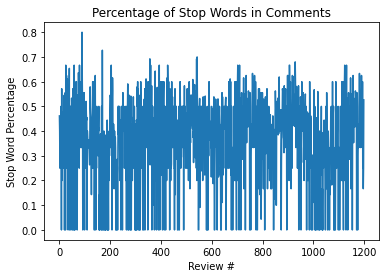

In [47]:
full = comment_df['Comment_Word_Count']
partial = comment_df['Stop_Word_Count']

comment_df['Stop_Words_%'] = partial/full
comment_df['Stop_Words_%'].plot()
plt.title('Percentage of Stop Words in Comments')
plt.xlabel('Review #')
plt.ylabel('Stop Word Percentage');

In [55]:
##comment_df[comment_df['Stop_Words_%'] > 0.80]['Comment'][145]

In [60]:
pd.Series(''.join(comment_df['No_Stop_Words:Comment']).split()).value_counts()[:50]

price        339
milk         295
good         212
product      181
not          169
very         147
taste        110
great        108
drink        104
best         103
products      99
powder        89
quality       84
expensive     84
love          72
buy           67
high          59
like          54
much          53
dairy         48
sri           46
flavor        40
money         39
highland      36
really        36
dont          35
little        34
tastes        34
one           32
prices        32
healthy       31
tasty         31
creamy        30
powdered      30
health        30
chocolate     30
excellent     29
anchor        29
fresh         29
ever          28
nice          28
cola          28
local         27
cheaper       27
lanka         26
delicious     25
favorite      25
get           25
would         25
always        25
dtype: int64

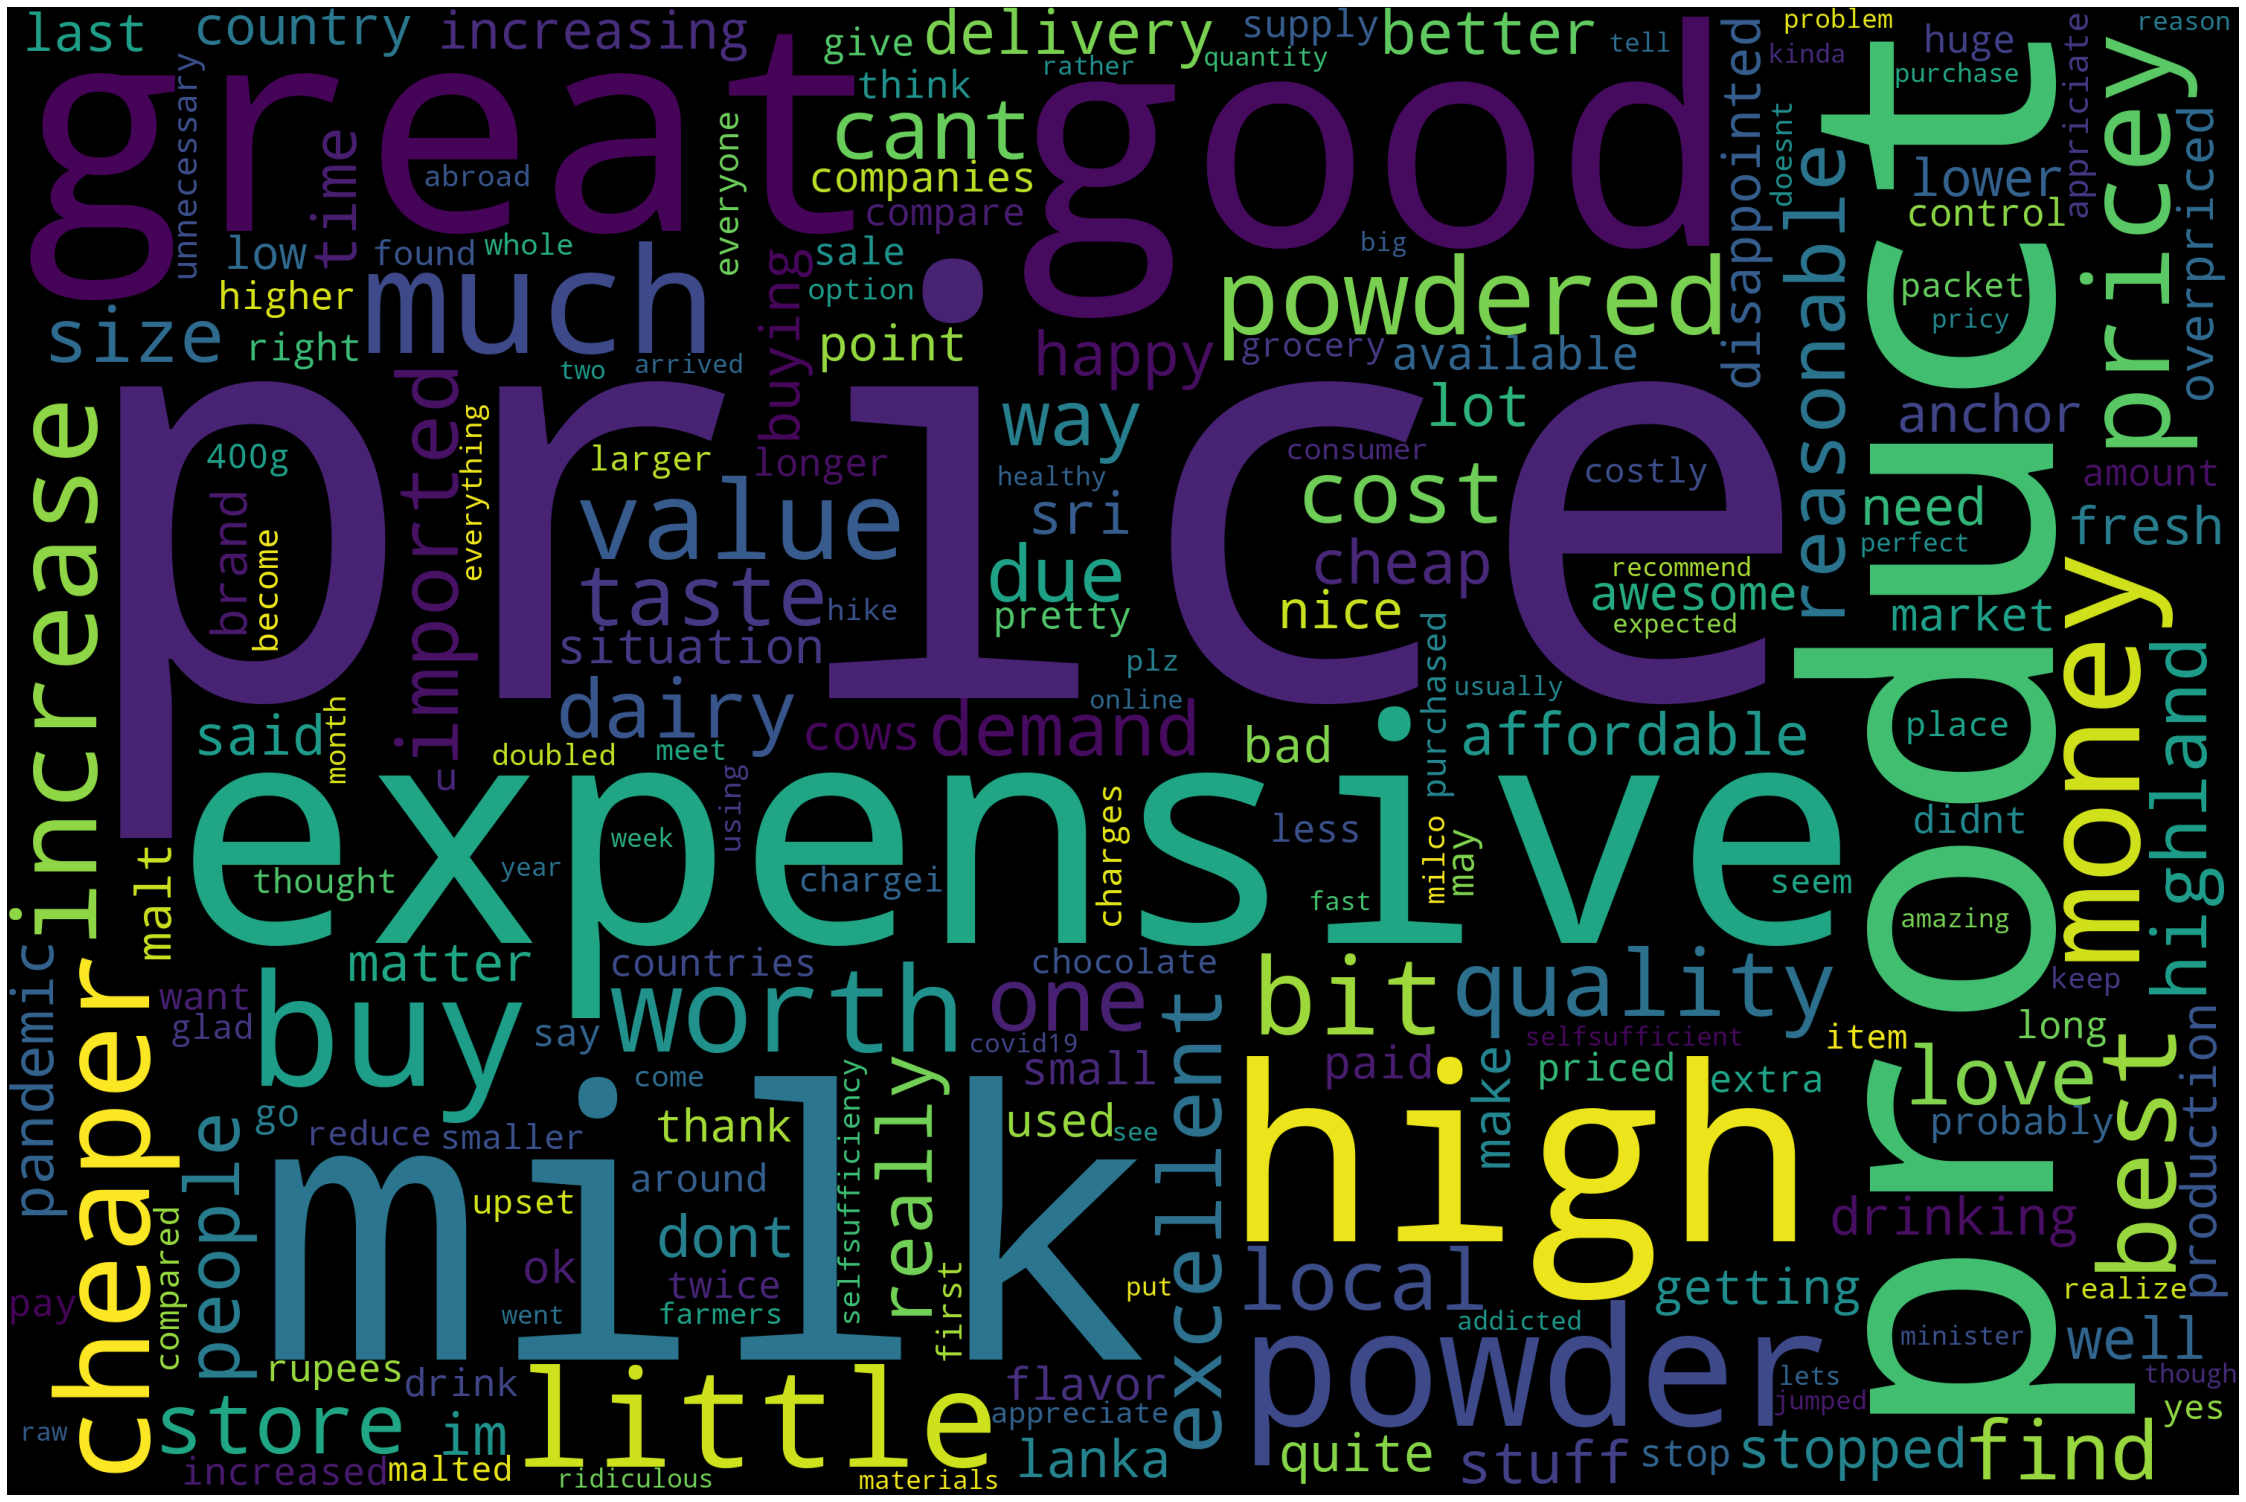

In [61]:
def get_all_text(aspect):
    all_words = ''
    for i in range(len(comment_df['Post Aspect'])):
        if comment_df['Post Aspect'][i] == aspect:
            words = comment_df['No_Stop_Words:Tokens'][i]
            blank = ''
            for word in words:
                blank = blank+' '+word
            all_words = all_words + ' '+blank
            
    return all_words


text = get_all_text("Price")

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(text)
plot_cloud(wordcloud)

## Stemming & Lemmatization

In [88]:
import textblob
from textblob import Word

In [89]:
comment_df['Lemmatized'] = comment_df['No_Stop_Words:Comment'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

In [90]:
import nltk
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")

comment = comment_df['Lemmatized'][1151]
wordList = nltk.word_tokenize(comment)

stemWords = [snowBallStemmer.stem(word) for word in wordList]

stemmed = ' '.join(stemWords)
print(comment)
print('')
print(stemmed)

one main reason higher price due fewer cow making milk meet demand cost feed went last year farmer cut back cow increase milk price may ripple effect dairy product including yogurt ice cream

one main reason higher price due fewer cow make milk meet demand cost feed went last year farmer cut back cow increas milk price may rippl effect dairi product includ yogurt ice cream


In [91]:
import re
def word_extraction(comment):   
    words = re.sub("[^\w]", " ",  comment).split()    
    cleaned_text = [w.lower() for w in words]    
    return cleaned_text

In [92]:
stemmed_list = []
stemmed_tokens_list = []
for i in range(len(comment_df)):
    comment = comment_df['Lemmatized'][i]
    wordList = nltk.word_tokenize(comment)
    stemWords = [snowBallStemmer.stem(word) for word in wordList]
    
    stemmed = ' '.join(stemWords)
    stemmed_list.append(stemmed)

In [93]:
comment_df['Stemmed:Comment'] = stemmed_list

In [94]:
for i in range(len(comment_df)):
    stemmed = comment_df['Stemmed:Comment'][i]
    tokens = word_extraction(stemmed)
    stemmed_tokens_list.append(tokens)

In [95]:
comment_df['Stemmed:Tokens'] = stemmed_tokens_list

In [96]:
comment_df['Stemmed:Tokens'][1151]

['one',
 'main',
 'reason',
 'higher',
 'price',
 'due',
 'fewer',
 'cow',
 'make',
 'milk',
 'meet',
 'demand',
 'cost',
 'feed',
 'went',
 'last',
 'year',
 'farmer',
 'cut',
 'back',
 'cow',
 'increas',
 'milk',
 'price',
 'may',
 'rippl',
 'effect',
 'dairi',
 'product',
 'includ',
 'yogurt',
 'ice',
 'cream']

In [98]:
comment_df['Stemmed_Word_Count'] = comment_df['Stemmed:Comment'].apply(lambda x: len(str(x).split()))

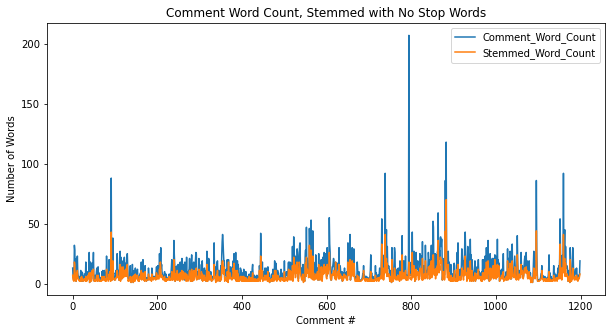

In [99]:
plt.figure(figsize=(10,5))
comment_df[comment_df['Comment_Word_Count']< 2000]['Comment_Word_Count'].plot()
comment_df[comment_df['Stemmed_Word_Count']< 1000]['Stemmed_Word_Count'].plot()
plt.title('Comment Word Count, Stemmed with No Stop Words')
plt.xlabel('Comment #')
plt.ylabel('Number of Words')
plt.legend()

## Positive Lexicon Building

In [101]:
file = open("positive_lexicon.txt", "r")
content = file.read()
pos_lexicon = content.splitlines()
pos_lexicon_stem = [snowBallStemmer.stem(word) for word in pos_lexicon]

In [103]:
positive_count = []
for i in range(len(comment_df)):
    count = 0
    tokens = comment_df['Stemmed:Tokens'][i]
    for word in tokens:
        if word in pos_lexicon_stem:
            count += 1
    positive_count.append(count)

In [104]:
comment_df['Positive_Word_Count'] = positive_count

In [106]:
comment_df['Positive_Words_%'] = comment_df['Positive_Word_Count']/(comment_df['Comment_Word_Count']-comment_df['Stop_Word_Count'])

Text(0, 0.5, 'Percentage')

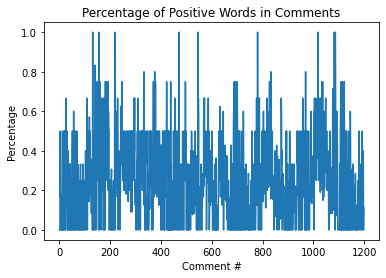

In [107]:
comment_df['Positive_Words_%'].plot()
plt.title('Percentage of Positive Words in Comments')
plt.xlabel('Comment #')
plt.ylabel('Percentage')

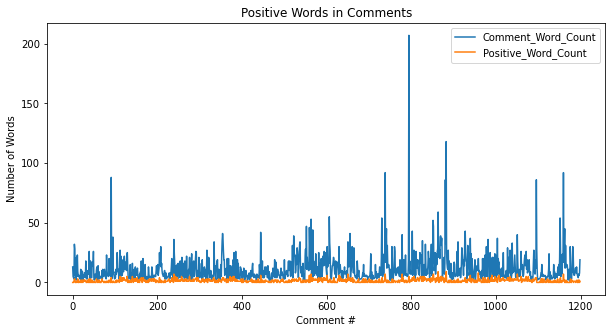

In [108]:
plt.figure(figsize=(10,5))
comment_df[comment_df['Comment_Word_Count']< 2000]['Comment_Word_Count'].plot()
comment_df[comment_df['Positive_Word_Count']< 600]['Positive_Word_Count'].plot()
plt.title('Positive Words in Comments')
plt.xlabel('Comment #')
plt.ylabel('Number of Words')
plt.legend()

## Word Count Matrix